# <font color="Green">CO2 Emission by Vehicles</font>

Life cycle of Machine Learning Project
* Understanding the Problem Stament
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre Processing
* Model Training
* Choose Best Model

## <font color="Green">1. Understanding The Problem</font>

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.

## <font color="Green">2. Data Collection</font>

[KAGGLE](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles)

### *<font color="Green">2.1. Import Data and Required Packages</font>*

Importing Numpy, Pandas, Matplotlib, Seaborn and Warnings Library

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [47]:
df = pd.read_csv("./data/DATA.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [48]:
df.shape

(7385, 12)

### *<font color="Green">2.2. Show information about dataset</font>*

Model       
4WD/4X4 = Four-wheel drive       
AWD = All-wheel drive       
FFV = Flexible-fuel vehicle       
SWB = Short wheelbase       
LWB = Long wheelbase       
EWB = Extended wheelbase       
       
Transmission       
A = Automatic       
AM = Automated manual       
AS = Automatic with select shift       
AV = Continuously variable       
M = Manual       
3 - 10 = Number of gears       
       
Fuel type       
X = Regular gasoline       
Z = Premium gasoline       
D = Diesel       
E = Ethanol (E85)       
N = Natural gas       
       
Fuel Consumption       
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)       
       
CO2 Emissions       
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving
     

## <font color="Green">3. Data Check to Perform</font>

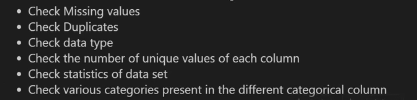

### *<font color="Green">3.1. Check missing values</font>*

In [49]:
df_nan = df.isnull().sum().to_frame()
porcentaje_nan = round((df.isnull().sum()/df.shape[0])*100,2).to_frame()
df_nan.rename({0:'count'}, axis=1,inplace=True)
porcentaje_nan.rename({0:'% nan'}, axis=1,inplace=True)
pd.concat([df_nan,porcentaje_nan],axis=1)

,count,% nan
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


* There are not missing values in any columns

### *<font color="Green">3.2. Check data type</font>*

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### *<font color="Green">3.3. Check the number of uniques values of each column</font>*

In [51]:
# Verificar si existen datos inconsistentes o poco relevantes
for col_name in df.columns:
    print('='*50)
    print(f'{col_name}: ', df[f'{col_name}'].unique(),'\n')

Make:  ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI'] 

Model:  ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD'] 

Vehicle Class:  ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL'] 

Engine Size(L):  [2.  2.4 1.5 3.5 3.7 1.8 5.9 4.7 3.  4.  6.3 4.2 5.2 6.  6.8 4.4 3.6 1.4
 2.5 6.2 4.3 5.3 4.8 1.2 5.7 6.4 4.6 5.4 1.6 5.  1.  5.8 3.8 3.3 5.6 3.2
 

### *<font color="Green">3.5. Check stadistics of dataset</font>*

In [52]:
# Numéricos
df.describe(exclude=[object])

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Insight:


In [53]:
# categóricos
df.describe(include=[object])

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


Insight:

### *<font color="Green">3.6. Check duplicates</font>*

In [54]:
df.duplicated().sum()

1103

In [55]:
# drop duplicates rows
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

### *<font color="Green">3.7. Exploring Data</font>*

In [56]:
category_columns = df.select_dtypes(include=[object]).columns
for col in category_columns:
    print(f"Categories in '{col}':")
    print(df[f'{col}'].unique(),'\n')

Categories in 'Make':
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI'] 

Categories in 'Model':
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD'] 

Categories in 'Vehicle Class':
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL'] 

Categories in 'Transmission':
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 

In [57]:
# define numerical and categorical features
numeric_features = list(df.select_dtypes(exclude=[object]).columns)
categorical_features = list(df.select_dtypes(include=[object]).columns)

print(f"There are {len(numeric_features)} numerical features: {numeric_features}")
print(f"There are {len(categorical_features)} categorical features: {categorical_features}")

There are 7 numerical features: ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
There are 5 categorical features: ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']


## <font color="Green">4. Exploring Data - Visualization</font>

<Figure size 1000x500 with 0 Axes>

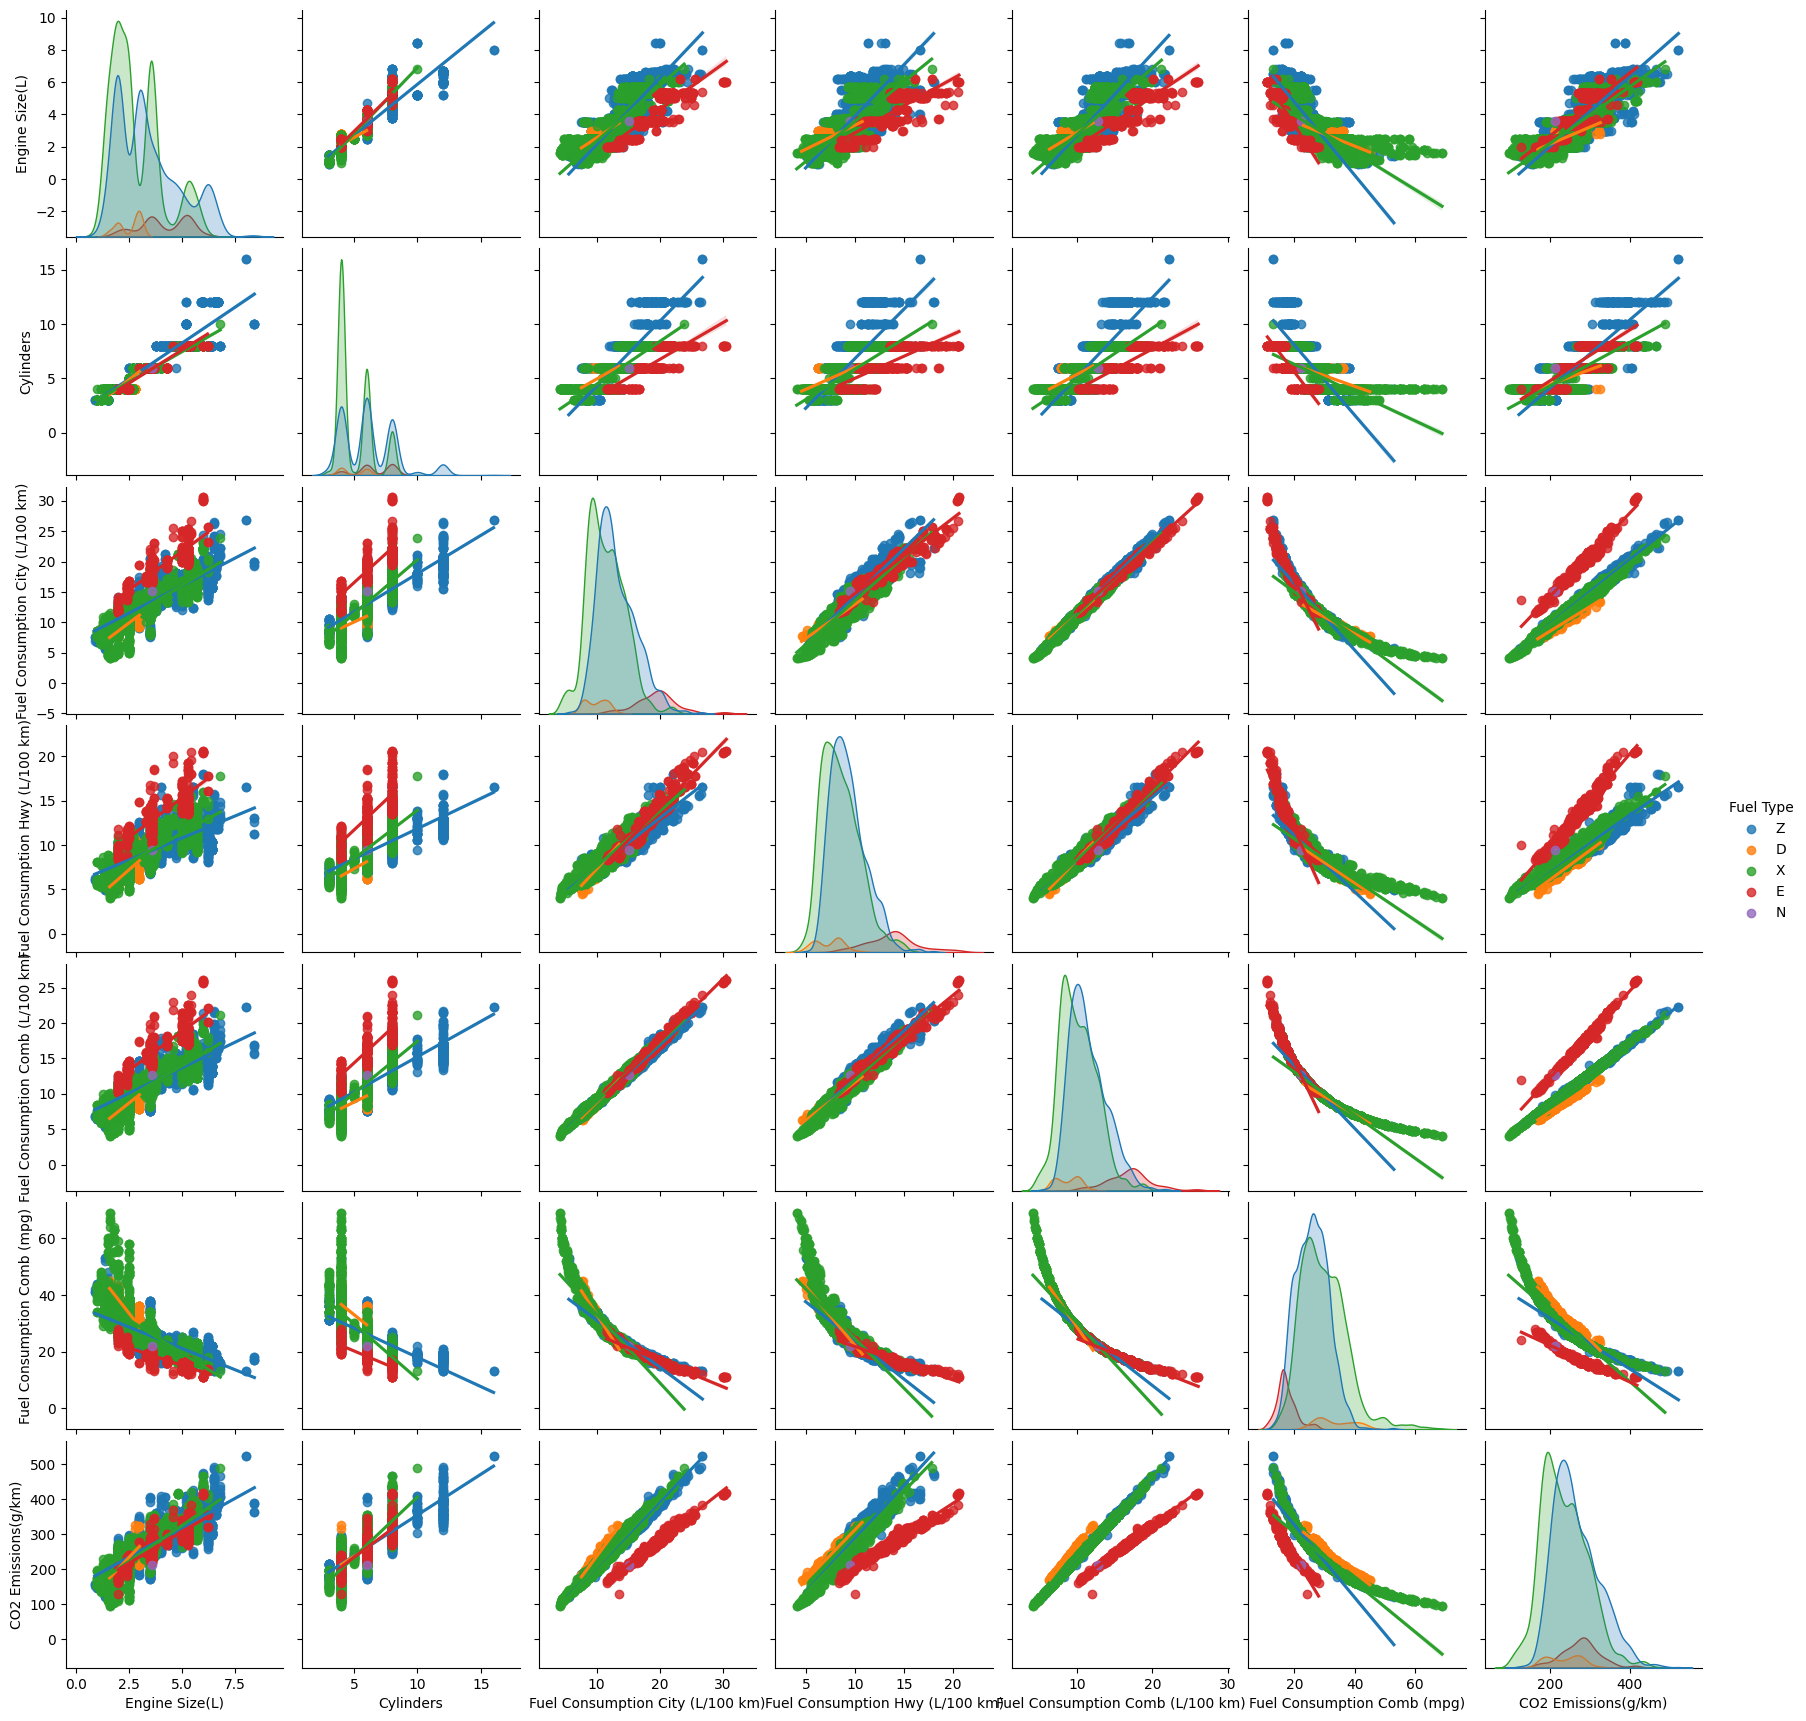

In [58]:
plt.figure(figsize=(10,5))
sns.pairplot(df,kind="reg",hue="Fuel Type")
plt.show()

## FEATURE ENGINEERING

In [59]:
df['Make_Type'] = df['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

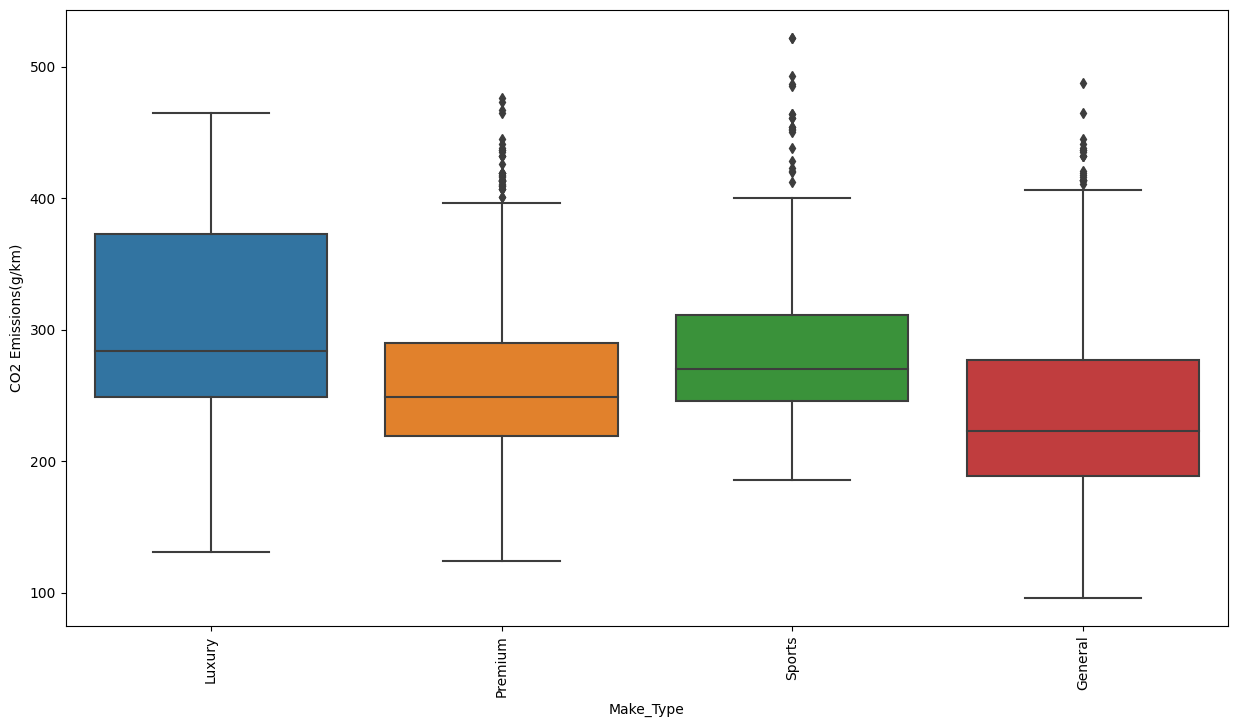

In [60]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Make_Type", y="CO2 Emissions(g/km)", data=df)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

Insight:



In [61]:
df['Vehicle_Class_Type'] = df['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [62]:
df.drop(['Vehicle Class'], inplace=True,  axis=1)
df['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

### *<font color="Green">4.3. Multivariate analysis using pieplot</font>*

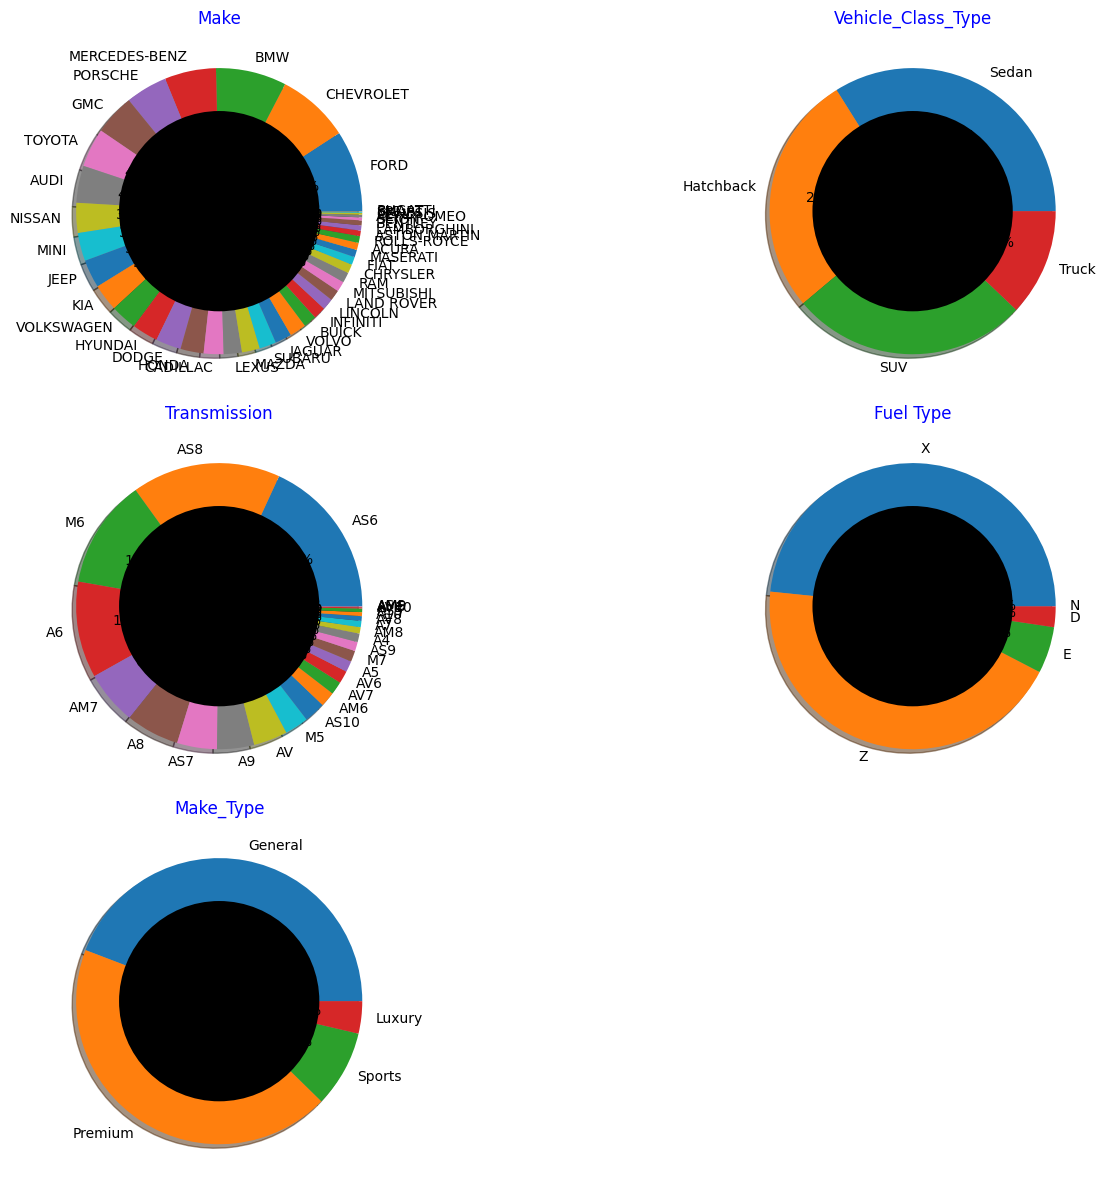

In [63]:
cat_vars = ['Make', 'Vehicle_Class_Type', 'Transmission', 'Fuel Type', 'Make_Type']

plt.figure(figsize=(15,12))

for i, var in enumerate(cat_vars):
    plt.subplot(3, 2, i+1)
    df[var].value_counts().plot(kind='pie',autopct='%.1f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.70,fc='black')
    plt.ylabel("")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var,color="blue")

plt.tight_layout()
plt.show()


Insights




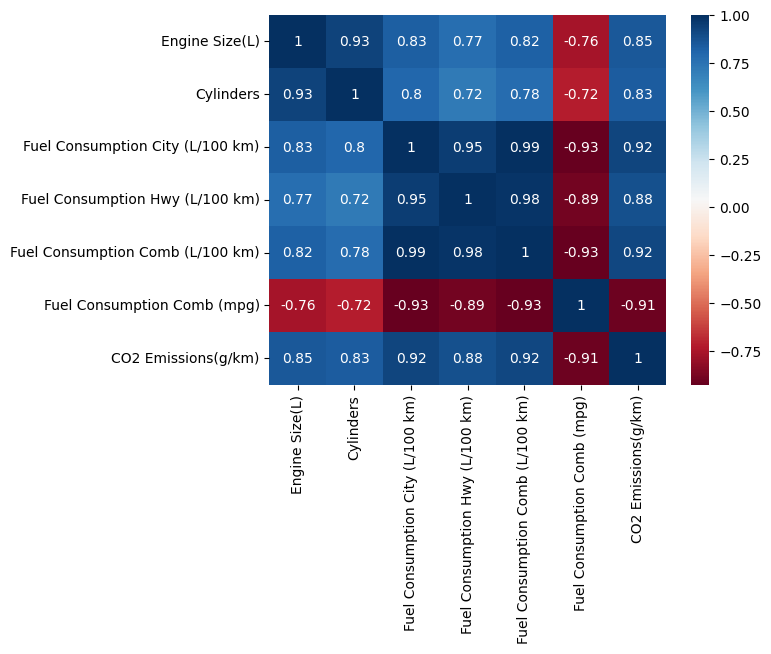

In [64]:
# Calcular la matriz de correlación
corr = df.corr()

# Graficar la matriz de correlación como un mapa de calor
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

## Drop columns

In [67]:
df.drop(['Make'],axis=1,inplace=True)

## Busqueda de valores atipicos

<Axes: >

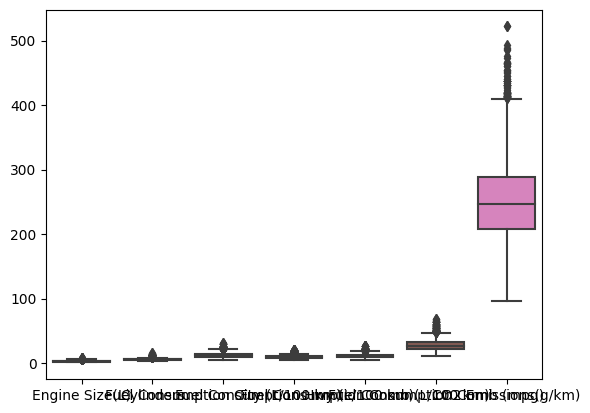

In [68]:
sns.boxplot(df)

## Renombrar columnas

In [69]:
# Crear el diccionario con los nombres antiguos y nuevos
new_names = {
    'Make': 'make',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission': 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_consumption_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_consumption_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_consumption_comb',
    'Fuel Consumption Comb (mpg)': 'fuel_consumption_comb_mpg',
    'CO2 Emissions(g/km)': 'co2_emissions',
    'Make_Type': 'make_type',
    'Vehicle_Class_Type': 'vehicle_class_type'
}

# Renombrar las columnas usando el diccionario
df = df.rename(columns=new_names)


In [70]:
tipos = df.dtypes
numericas = tipos[tipos != object].index
numericas

Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [71]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=list(numericas)) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo
windsoriser.fit(df)
# transformar en base a los datos entrenados
df = windsoriser.transform(df)

<Axes: >

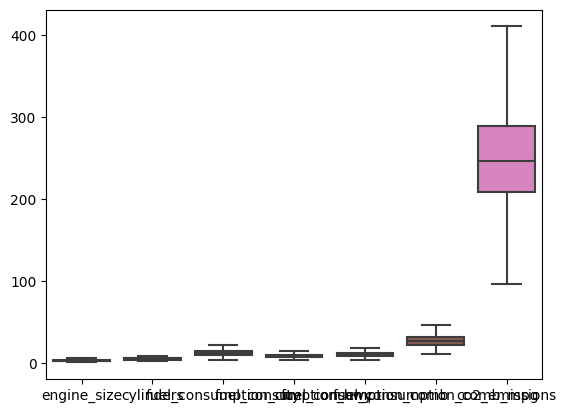

In [72]:
sns.boxplot(df)

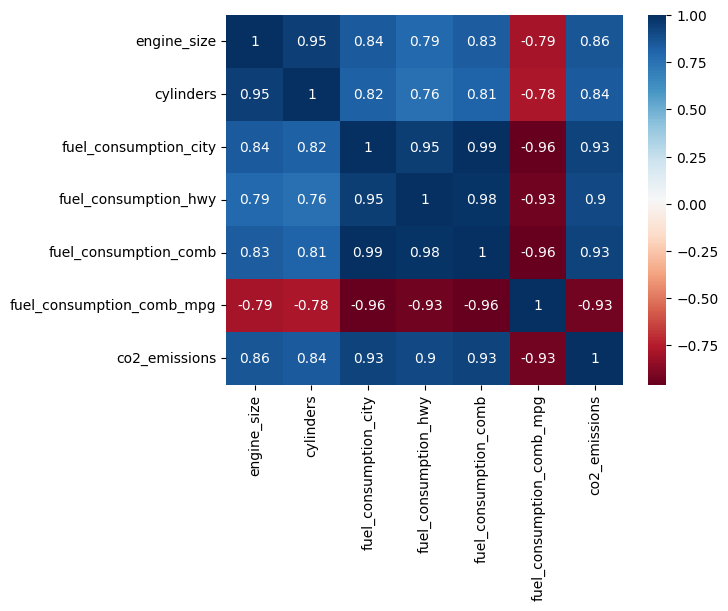

In [73]:
# Calcular la matriz de correlación
corr = df.corr()

# Graficar la matriz de correlación como un mapa de calor
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

In [ ]:
df.to_csv("./data/DATA_CLEANED.csv", index=False)